# Pymaceuticals Inc.
---

### Analysis

Analysis
When comparing all nine drug treatments, along with placebo, the analysis shows that Capomulin and Ramicane had a longer survival rate when compared to the other drugs tested. The remaining drugs had a similar survival rate as compared to placebo, suggesting that they may be ineffective for treating squamous cell carcinoma (SCC). 
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_drug_trials = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])


# Display the data table for preview
mouse_drug_trials.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
# Checking the number of mice.
mouse_count = mouse_drug_trials["Mouse ID"].nunique()
mouse_count

249

In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_drug_trials.loc[mouse_drug_trials.duplicated()]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = mouse_drug_trials.loc[mouse_drug_trials["Mouse ID"]=="g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_drug_trials.loc[mouse_drug_trials["Mouse ID"]!="g989"]
clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_mouse["Mouse ID"].nunique()
mouse_count2

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_mouse.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({'Mean Tumor Volume': drug_data['Tumor Volume (mm3)'].mean(),
                                   'Median Tumor Volume': drug_data['Tumor Volume (mm3)'].median(),
                                   'Tumor Volume Variance': drug_data['Tumor Volume (mm3)'].var(),
                                   'Tumor Volume Std. Dev.': drug_data['Tumor Volume (mm3)'].std(),
                                   'Tumor Volume Std. Err.': drug_data['Tumor Volume (mm3)'].sem()})
plt.savefig('Summary_Statistics.png')
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Figure size 640x480 with 0 Axes>

In [41]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

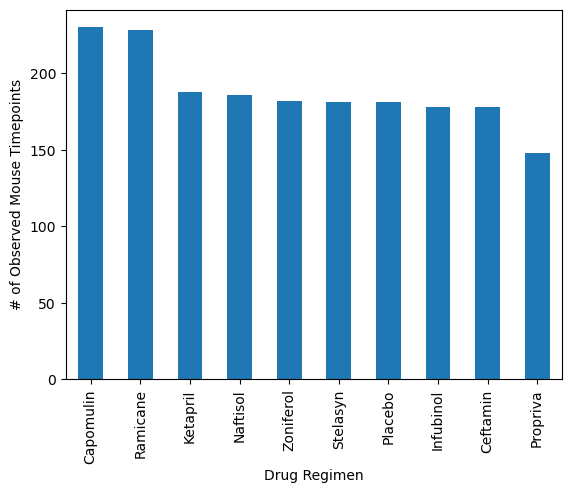

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

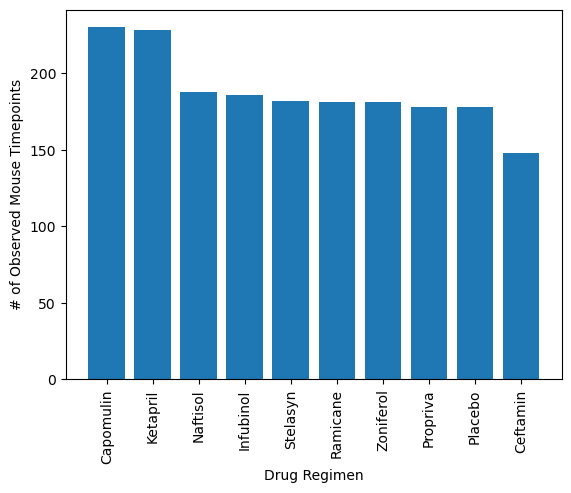

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_data = clean_mouse['Drug Regimen'].value_counts()
x_data = range(0,len(y_data))

# Get names of drugs
drugs = clean_mouse['Drug Regimen'].unique().tolist()

# Plot data
fig1 = plt.figure()
plt.bar(x_data,y_data)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(x_data, drugs, rotation='vertical')

plt.savefig('Timepoints_Regimen.png')
plt.show()

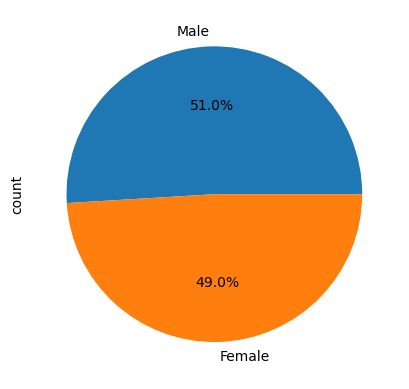

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

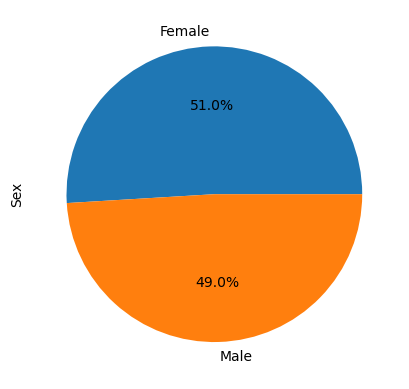

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = clean_mouse['Sex'].value_counts()
labels_list = clean_mouse['Sex'].unique()

plt.pie(sexes, labels=labels_list, autopct="%1.1f%%")
plt.ylabel('Sex')

plt.savefig('Male_Female_Distribution.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_data_tumor_volume = pd.merge(max_timepoint, clean_mouse, on=['Mouse ID','Timepoint'], how='inner')
study_data_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
focus_on_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin': [],
                  'Ramicane': [],
                  'Infubinol': [],
                  'Ceftamin': []}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in focus_on_drugs:
    tumor_volume = study_data_tumor_volume.loc[study_data_tumor_volume['Drug Regimen']==drug,:]['Tumor Volume (mm3)']
    tumor_vol_data[drug] = tumor_volume.to_list()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    # add subset 
    for vol in tumor_vol_data[drug]:
    
    # Determine outliers using upper and lower bounds
        if (vol > upper_bound) | (vol < lower_bound):
                    print(f"Potential outlier for {drug}. Tumor volume = {vol:.2f} mm3")

    print(f"Data for drug '{drug}' processed.")

Data for drug 'Capomulin' processed.
Data for drug 'Ramicane' processed.
Potential outlier for Infubinol. Tumor volume = 36.32 mm3
Data for drug 'Infubinol' processed.
Data for drug 'Ceftamin' processed.


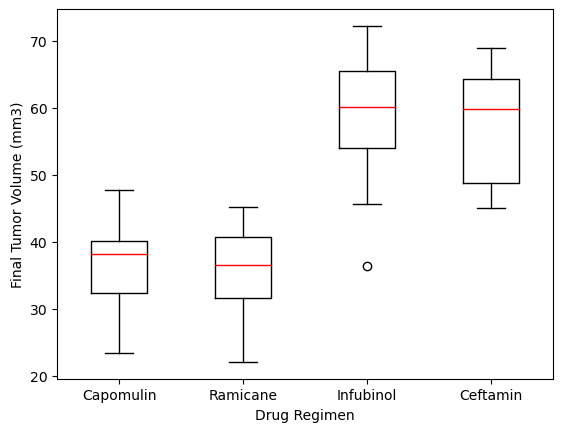

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_df = pd.DataFrame(tumor_vol_data)

props = dict(boxes="Black", whiskers="Black", medians="Red", caps="Black")

fig2 = tumor_vol_df.plot.box(xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)',grid=False,color=props, patch_artist=False)

plt.savefig('Boxplot.png')
plt.show()


## Line and Scatter Plots

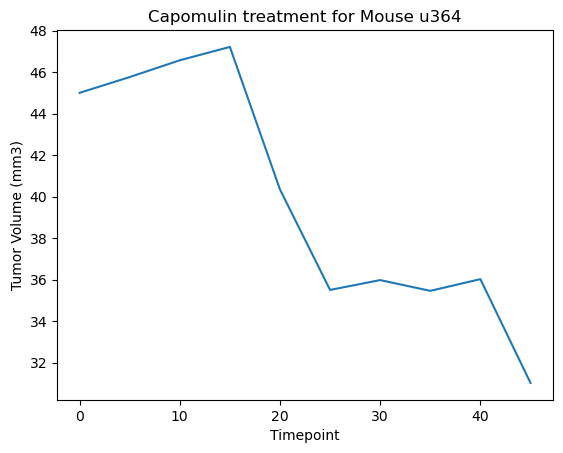

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
select_mouse = 'u364'

select_data = clean_mouse.loc[clean_mouse['Mouse ID']==select_mouse,:]

drug_regimen = select_data['Tumor Volume (mm3)']

select_data.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',
                 legend=False, ylabel='Tumor Volume (mm3)',
                 title=f"Capomulin treatment for Mouse {select_mouse}")

plt.savefig('Mouse u364 Treatment.png')
plt.show()



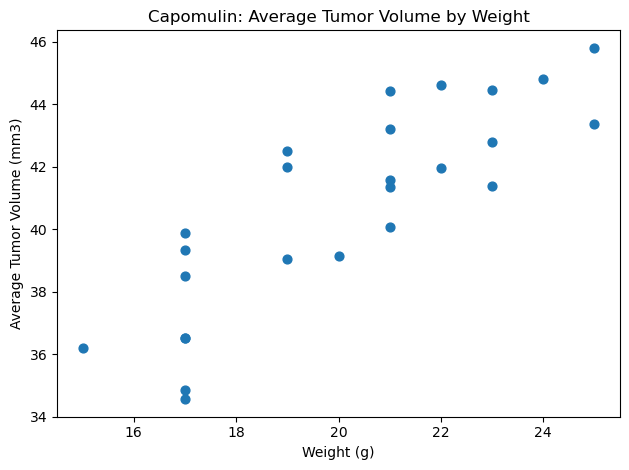

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimencle

drug_regimen = "Capomulin"
drug_regimen_results = clean_mouse.loc[clean_mouse["Drug Regimen"]== drug_regimen, ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].reset_index(drop=True)
drug_regimen_results = drug_regimen_results.groupby("Mouse ID").mean()


# Create Scatter Plot
drug_regimen_results.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40)

# Format Chart
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"{drug_regimen}: Average Tumor Volume by Weight")
plt.tight_layout()


plt.savefig('MouseWeight_TumorVolume.png')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


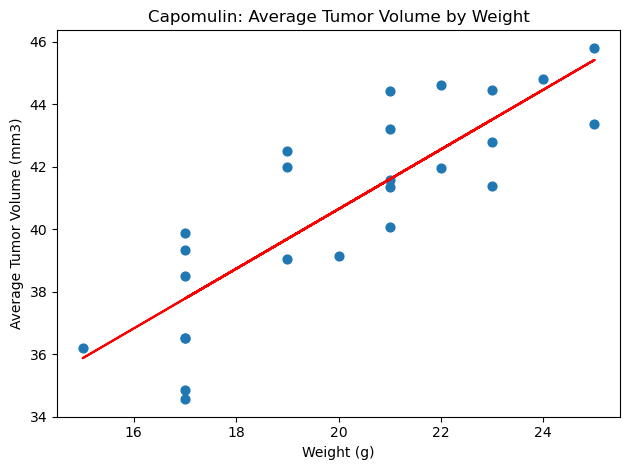

In [51]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(drug_regimen_results["Weight (g)"], drug_regimen_results["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Calculate regression line
x_values = drug_regimen_results["Weight (g)"]
y_values = drug_regimen_results["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create Scatter Plot with Liniar Regression
drug_regimen_results.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40)
plt.plot(x_values,regress_values,"r-")


# Format Chart
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"{drug_regimen}: Average Tumor Volume by Weight")
plt.tight_layout()


plt.savefig('MouseWeight_TumorVolume_Correlation.png')
plt.show()



